In [1]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import  time

2023-12-12 17:12:28.714550: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-12 17:12:30.418295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
train_dir = 'data/Training1'
test_dir = 'data/Test'

In [6]:
input_shape=(128, 128, 3)
batch_size=16
num_classes=24

In [7]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

validation_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)

test_datagen=ImageDataGenerator(
    rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

validation_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb')

Found 7485 images belonging to 24 classes.
Found 1860 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [8]:
def vgg16_model(num_classes):

    model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x=Flatten()(model.output)
    output=Dense(num_classes,activation='softmax')(x)
    model=Model(model.input,output)

    return model

def ResNet50_model(num_classes):

    model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x=Flatten()(model.output)
    output=Dense(num_classes,activation='softmax')(x)
    model=Model(model.input,output)

    return model

def InceptionV3_mdoel(num_classes):
    model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x=Flatten()(model.output)
    output=Dense(num_classes,activation='softmax')(x)
    model=Model(model.input,output)

    return model

In [9]:
modelA=vgg16_model(num_classes)
modelB=ResNet50_model(num_classes)
modelC=InceptionV3_mdoel(num_classes)

2023-12-12 17:12:59.100937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 17:12:59.187039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 17:12:59.187336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

87910968/87910968 [==============================] - 13s 0us/step


In [21]:
modelA.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

start_time = time.time()
history_1=modelA.fit(train_generator, epochs=10, validation_data=(validation_generator), verbose=1)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/10
468/468 [==============================] - 41s 79ms/step - loss: 0.0845 - accuracy: 0.9766 - val_loss: 1.8345 - val_accuracy: 0.7161
Epoch 2/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0934 - accuracy: 0.9714 - val_loss: 1.0271 - val_accuracy: 0.8392
Epoch 3/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0367 - accuracy: 0.9876 - val_loss: 0.7240 - val_accuracy: 0.8618
Epoch 4/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.7293 - val_accuracy: 0.8715
Epoch 5/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0745 - accuracy: 0.9778 - val_loss: 0.8524 - val_accuracy: 0.8699
Epoch 6/10
468/468 [==============================] - 37s 79ms/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 1.0945 - val_accuracy: 0.8629
Epoch 7/10
468/468 [==============================] - 38s 82ms/step - loss: 0.0721 - accuracy: 0.9801 - val_loss: 0.9697 - val_accuracy:

In [23]:
modelB.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
start_time = time.time()
history_2=modelB.fit(train_generator, epochs=10, validation_data=(validation_generator), verbose=1)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/10
468/468 [==============================] - 66s 83ms/step - loss: 0.1772 - accuracy: 0.9691 - val_loss: 5.6690 - val_accuracy: 0.6452
Epoch 2/10
468/468 [==============================] - 38s 81ms/step - loss: 0.1204 - accuracy: 0.9792 - val_loss: 1.6433 - val_accuracy: 0.8269
Epoch 3/10
468/468 [==============================] - 39s 82ms/step - loss: 0.1115 - accuracy: 0.9824 - val_loss: 5.1305 - val_accuracy: 0.7054
Epoch 4/10
468/468 [==============================] - 39s 84ms/step - loss: 0.1149 - accuracy: 0.9793 - val_loss: 2.7991 - val_accuracy: 0.7263
Epoch 5/10
468/468 [==============================] - 38s 82ms/step - loss: 0.0939 - accuracy: 0.9836 - val_loss: 1.6051 - val_accuracy: 0.8414
Epoch 6/10
468/468 [==============================] - 38s 80ms/step - loss: 0.0642 - accuracy: 0.9878 - val_loss: 2.3939 - val_accuracy: 0.7753
Epoch 7/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0849 - accuracy: 0.9881 - val_loss: 1.4312 - val_accuracy:

In [30]:
modelC.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
start_time = time.time()
history_3=modelC.fit(train_generator, epochs=10, validation_data=(validation_generator), verbose=1)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/10
468/468 [==============================] - 66s 85ms/step - loss: 0.1776 - accuracy: 0.9508 - val_loss: 0.7773 - val_accuracy: 0.8274
Epoch 2/10
468/468 [==============================] - 40s 85ms/step - loss: 0.2197 - accuracy: 0.9464 - val_loss: 0.0819 - val_accuracy: 0.9715
Epoch 3/10
468/468 [==============================] - 38s 82ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.6635 - val_accuracy: 0.8194
Epoch 4/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0645 - accuracy: 0.9794 - val_loss: 2.6580 - val_accuracy: 0.7844
Epoch 5/10
468/468 [==============================] - 38s 81ms/step - loss: 0.0458 - accuracy: 0.9884 - val_loss: 0.1943 - val_accuracy: 0.9532
Epoch 6/10
468/468 [==============================] - 40s 85ms/step - loss: 0.1562 - accuracy: 0.9575 - val_loss: 0.2861 - val_accuracy: 0.9296
Epoch 7/10
468/468 [==============================] - 39s 83ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.1102 - val_accuracy:

# Test model VGG16

In [13]:
test_loss, test_acc = modelA.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

195/195 [==============================] - 5s 25ms/step - loss: 0.1844 - accuracy: 0.9547
Test loss: 0.18436233699321747
Test accuracy: 0.9546623826026917


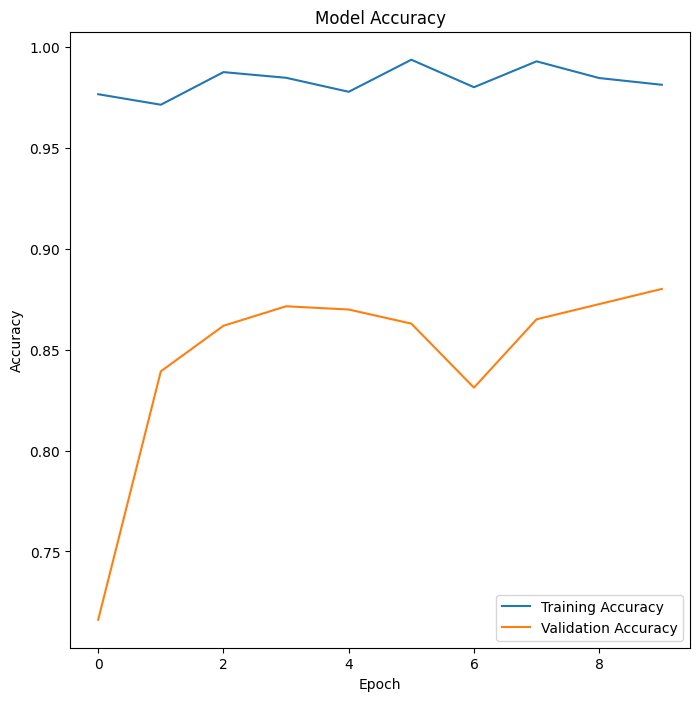

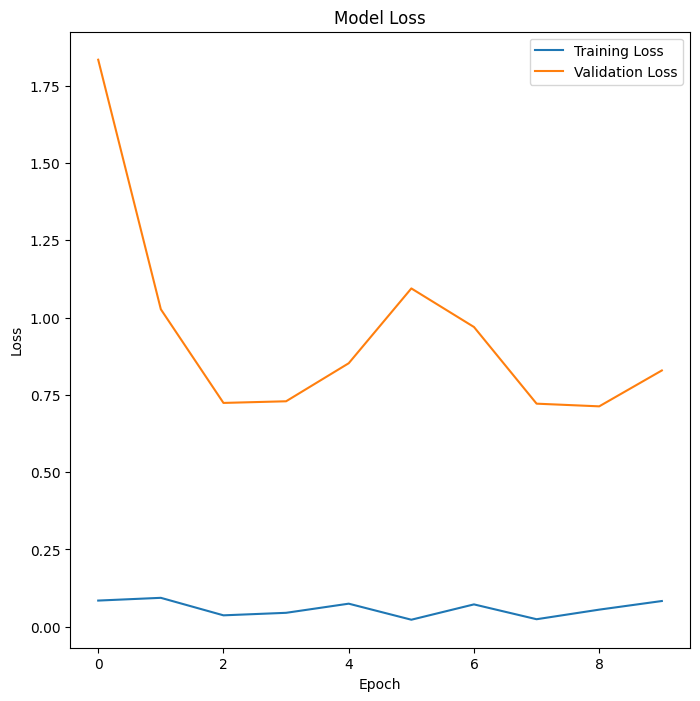

In [22]:
plt.figure(figsize=(8,8))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()

#Trainig loss and validation loss graph
plt.figure(figsize=(8,8))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()

195/195 [==============================] - 5s 24ms/step


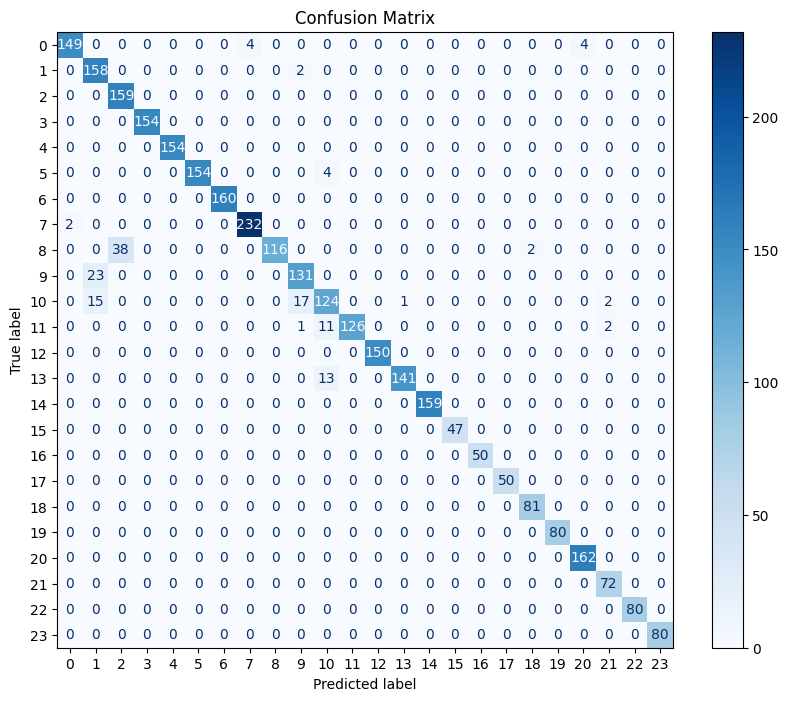


Classification Report:
                      precision    recall  f1-score   support

             apple_6       0.99      0.95      0.97       157
    apple_braeburn_1       0.81      0.99      0.89       160
apple_crimson_snow_1       0.81      1.00      0.89       159
      apple_golden_1       1.00      1.00      1.00       154
      apple_golden_2       1.00      1.00      1.00       154
      apple_golden_3       1.00      0.97      0.99       158
apple_granny_smith_1       1.00      1.00      1.00       160
         apple_hit_1       0.98      0.99      0.99       234
   apple_pink_lady_1       1.00      0.74      0.85       156
         apple_red_1       0.87      0.85      0.86       154
         apple_red_2       0.82      0.78      0.80       159
         apple_red_3       1.00      0.90      0.95       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       0.99      0.92      0.95       154
      apple_rotten_1       1.00      1.00    

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred = modelA.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 调整图形尺寸
fig, ax = plt.subplots(figsize=(10, 8))

# 生成混淆矩阵图
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title('Confusion Matrix')
plt.show()

class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [16]:
from sklearn.metrics import f1_score

f1=f1_score(y_true,y_pred_classes,average='weighted')
print('F1-score:', f1)

F1-score: 0.954507094411508


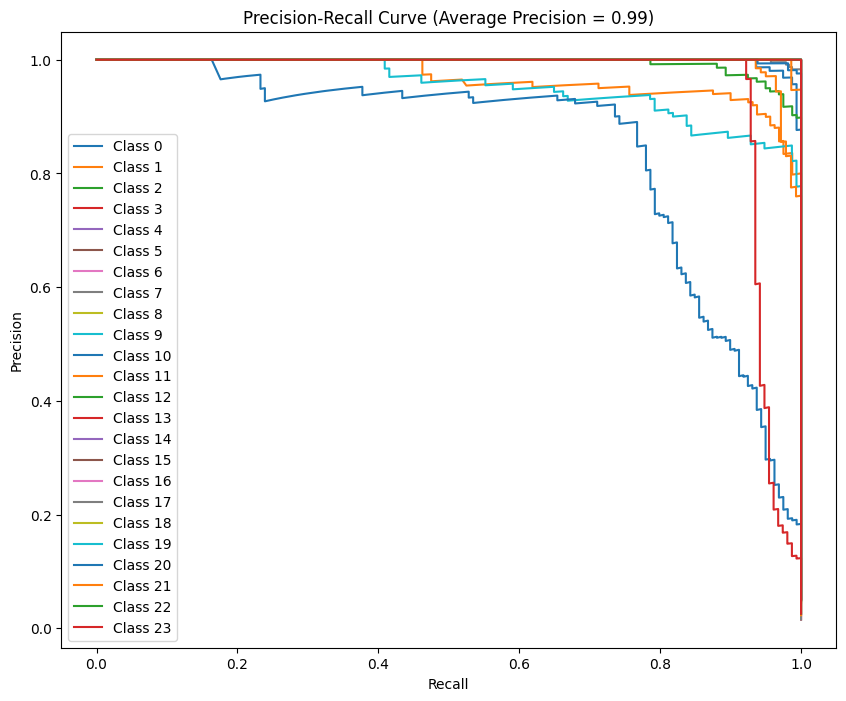

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

# 获取类别数量
n_classes = num_classes

# 将真实标签进行二进制编码
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# 计算每个类别的精确度、召回率和阈值
precision = dict()
recall = dict()
thresholds = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])

# 计算平均精确度
average_precision = average_precision_score(y_true_bin, y_pred, average='weighted')

# 绘制每个类别的精确度-召回率曲线
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Average Precision = {average_precision:.2f})')
plt.legend()
plt.show()


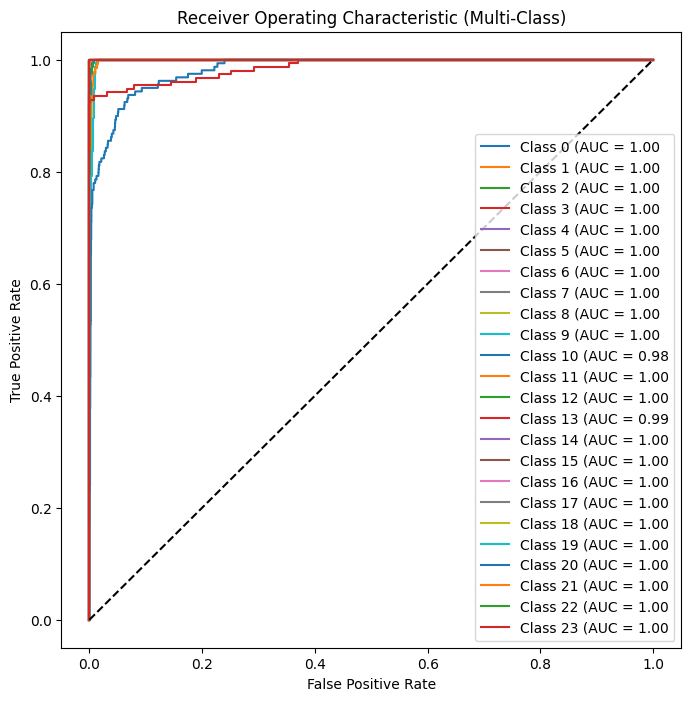

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (y_true == class_label).astype(int),  # 二进制标签，表示当前类别为正类
        y_pred[:, class_label]  # 模型的预测概率值
    )

    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# 绘制多分类问题的 ROC 曲线
plt.figure(figsize=(8, 8))

for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (Multi-Class)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 计算每个类别的敏感性和特异性
num_classes = len(class_names)
sensitivity = []
specificity = []

for i in range(num_classes):
    # True positive
    tp = conf_matrix[i, i]

    # False negative
    fn = np.sum(conf_matrix[i, :]) - tp

    # False positive
    fp = np.sum(conf_matrix[:, i]) - tp

    # True negative
    tn = np.sum(conf_matrix) - tp - fn - fp

    # 计算敏感性和特异性
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# 输出结果
for i in range(num_classes):
    print(f"Class {class_names[i]} - Sensitivity: {sensitivity[i]:.4f}, Specificity: {specificity[i]:.4f}")

# 计算平均敏感性和特异性
average_sensitivity = np.mean(sensitivity)
average_specificity = np.mean(specificity)

print(f"\nAverage Sensitivity: {average_sensitivity:.4f}")
print(f"Average Specificity: {average_specificity:.4f}")


Class apple_6 - Sensitivity: 0.9490, Specificity: 0.9993
Class apple_braeburn_1 - Sensitivity: 0.9875, Specificity: 0.9871
Class apple_crimson_snow_1 - Sensitivity: 1.0000, Specificity: 0.9871
Class apple_golden_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_golden_2 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_golden_3 - Sensitivity: 0.9747, Specificity: 1.0000
Class apple_granny_smith_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_hit_1 - Sensitivity: 0.9915, Specificity: 0.9986
Class apple_pink_lady_1 - Sensitivity: 0.7436, Specificity: 1.0000
Class apple_red_1 - Sensitivity: 0.8506, Specificity: 0.9932
Class apple_red_2 - Sensitivity: 0.7799, Specificity: 0.9905
Class apple_red_3 - Sensitivity: 0.9000, Specificity: 1.0000
Class apple_red_delicios_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_red_yellow_1 - Sensitivity: 0.9156, Specificity: 0.9997
Class apple_rotten_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class cabbage_white_1 - Sensitiv

# Test ResNet50 model

In [20]:
test_loss, test_acc = modelB.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

195/195 [==============================] - 5s 26ms/step - loss: 0.0810 - accuracy: 0.9765
Test loss: 0.08096452057361603
Test accuracy: 0.9765273332595825


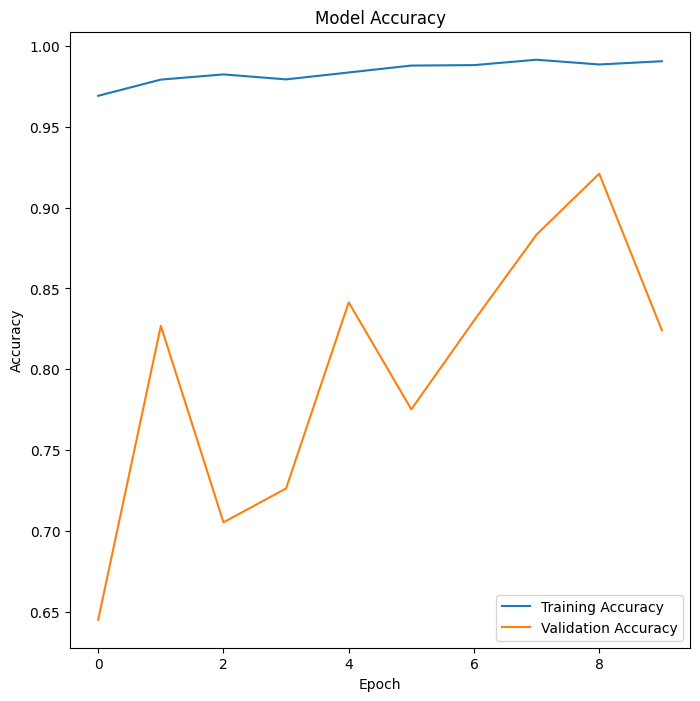

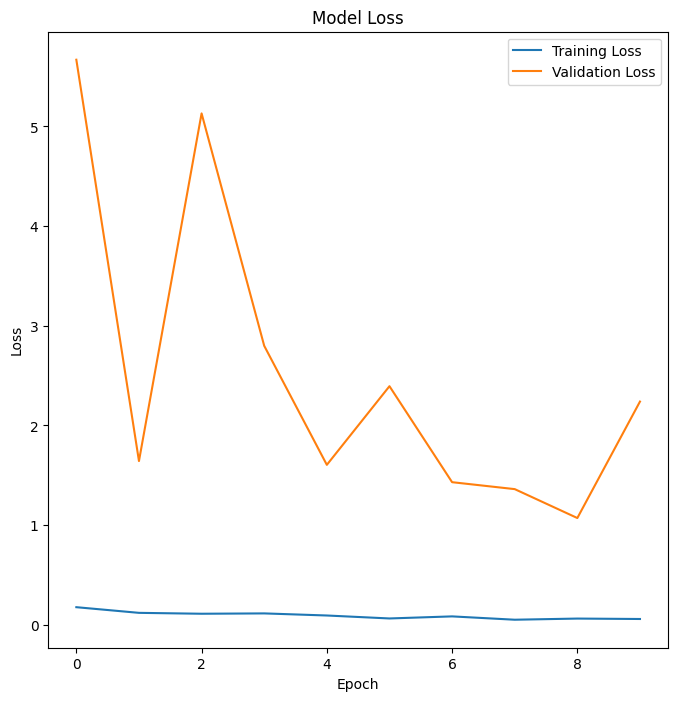

In [24]:
plt.figure(figsize=(8,8))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()

#Trainig loss and validation loss graph
plt.figure(figsize=(8,8))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()

195/195 [==============================] - 6s 26ms/step


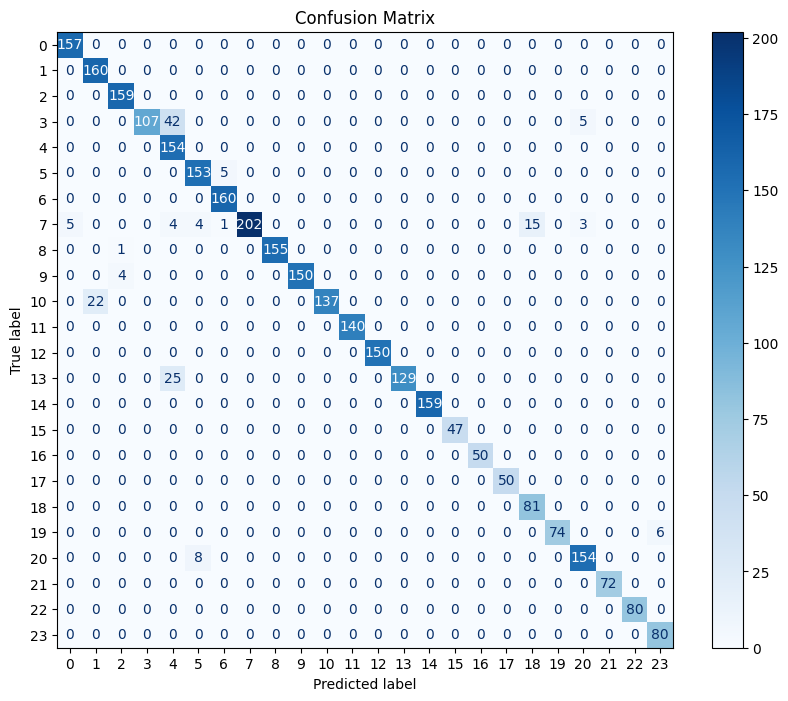


Classification Report:
                      precision    recall  f1-score   support

             apple_6       0.97      1.00      0.98       157
    apple_braeburn_1       0.88      1.00      0.94       160
apple_crimson_snow_1       0.97      1.00      0.98       159
      apple_golden_1       1.00      0.69      0.82       154
      apple_golden_2       0.68      1.00      0.81       154
      apple_golden_3       0.93      0.97      0.95       158
apple_granny_smith_1       0.96      1.00      0.98       160
         apple_hit_1       1.00      0.86      0.93       234
   apple_pink_lady_1       1.00      0.99      1.00       156
         apple_red_1       1.00      0.97      0.99       154
         apple_red_2       1.00      0.86      0.93       159
         apple_red_3       1.00      1.00      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       1.00      0.84      0.91       154
      apple_rotten_1       1.00      1.00    

In [25]:
y_pred = modelB.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 调整图形尺寸
fig, ax = plt.subplots(figsize=(10, 8))

# 生成混淆矩阵图
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title('Confusion Matrix')
plt.show()

class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [26]:
f1=f1_score(y_true,y_pred_classes,average='weighted')
print('F1-score:', f1)

F1-score: 0.9520728642443428


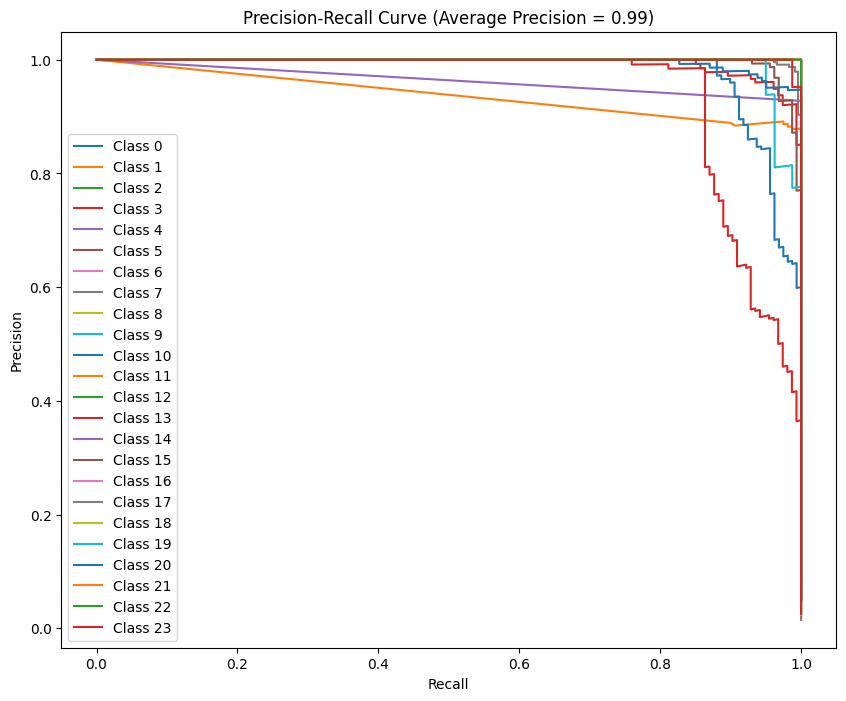

In [27]:
# 获取类别数量
n_classes = num_classes

# 将真实标签进行二进制编码
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# 计算每个类别的精确度、召回率和阈值
precision = dict()
recall = dict()
thresholds = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])

# 计算平均精确度
average_precision = average_precision_score(y_true_bin, y_pred, average='weighted')

# 绘制每个类别的精确度-召回率曲线
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Average Precision = {average_precision:.2f})')
plt.legend()
plt.show()

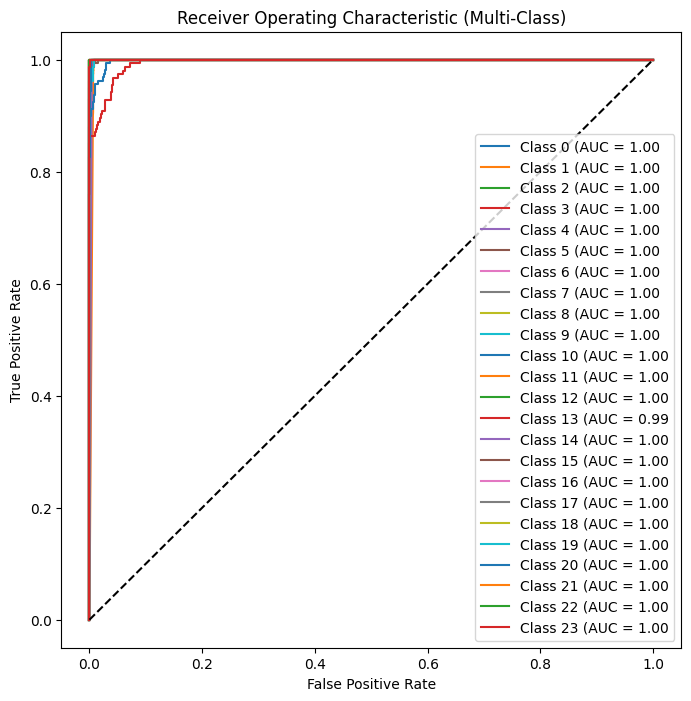

In [28]:
# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (y_true == class_label).astype(int),  # 二进制标签，表示当前类别为正类
        y_pred[:, class_label]  # 模型的预测概率值
    )

    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# 绘制多分类问题的 ROC 曲线
plt.figure(figsize=(8, 8))

for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (Multi-Class)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [29]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 计算每个类别的敏感性和特异性
num_classes = len(class_names)
sensitivity = []
specificity = []

for i in range(num_classes):
    # True positive
    tp = conf_matrix[i, i]

    # False negative
    fn = np.sum(conf_matrix[i, :]) - tp

    # False positive
    fp = np.sum(conf_matrix[:, i]) - tp

    # True negative
    tn = np.sum(conf_matrix) - tp - fn - fp

    # 计算敏感性和特异性
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# 输出结果
for i in range(num_classes):
    print(f"Class {class_names[i]} - Sensitivity: {sensitivity[i]:.4f}, Specificity: {specificity[i]:.4f}")

# 计算平均敏感性和特异性
average_sensitivity = np.mean(sensitivity)
average_specificity = np.mean(specificity)

print(f"\nAverage Sensitivity: {average_sensitivity:.4f}")
print(f"Average Specificity: {average_specificity:.4f}")


Class apple_6 - Sensitivity: 1.0000, Specificity: 0.9983
Class apple_braeburn_1 - Sensitivity: 1.0000, Specificity: 0.9925
Class apple_crimson_snow_1 - Sensitivity: 1.0000, Specificity: 0.9983
Class apple_golden_1 - Sensitivity: 0.6948, Specificity: 1.0000
Class apple_golden_2 - Sensitivity: 1.0000, Specificity: 0.9760
Class apple_golden_3 - Sensitivity: 0.9684, Specificity: 0.9959
Class apple_granny_smith_1 - Sensitivity: 1.0000, Specificity: 0.9980
Class apple_hit_1 - Sensitivity: 0.8632, Specificity: 1.0000
Class apple_pink_lady_1 - Sensitivity: 0.9936, Specificity: 1.0000
Class apple_red_1 - Sensitivity: 0.9740, Specificity: 1.0000
Class apple_red_2 - Sensitivity: 0.8616, Specificity: 1.0000
Class apple_red_3 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_red_delicios_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_red_yellow_1 - Sensitivity: 0.8377, Specificity: 1.0000
Class apple_rotten_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class cabbage_white_1 - Sensitiv

# Test InceptionV3 mdoel

In [31]:
test_loss, test_acc = modelC.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

195/195 [==============================] - 5s 28ms/step - loss: 0.0293 - accuracy: 0.9878
Test loss: 0.029283223673701286
Test accuracy: 0.9877813458442688


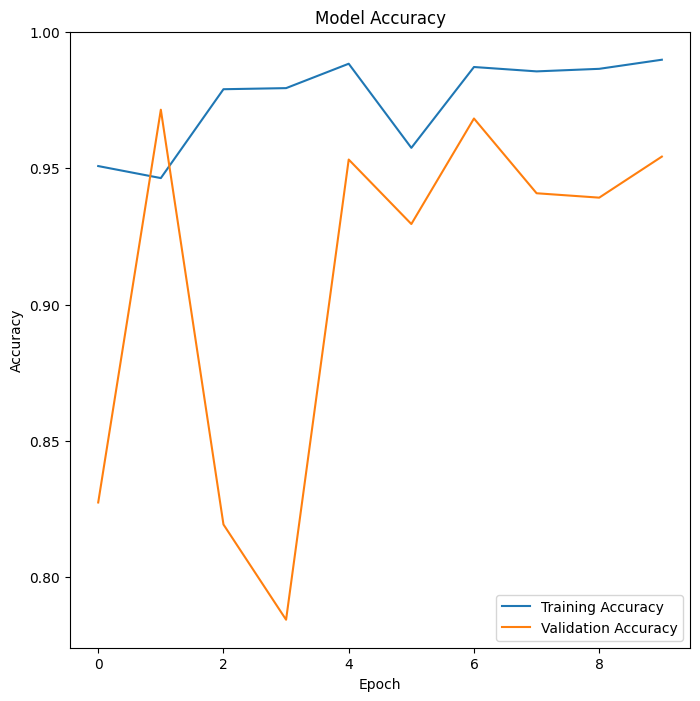

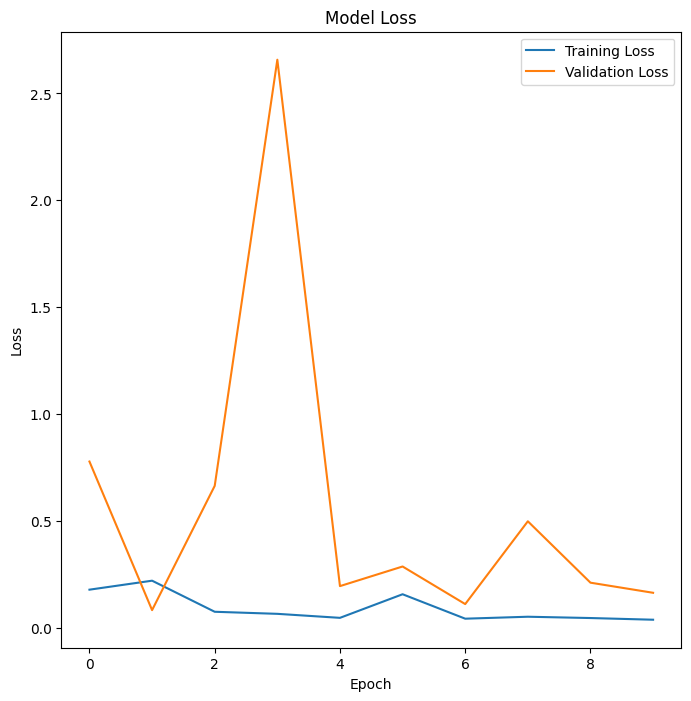

In [32]:
plt.figure(figsize=(8,8))
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()

#Trainig loss and validation loss graph
plt.figure(figsize=(8,8))
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()

195/195 [==============================] - 6s 28ms/step


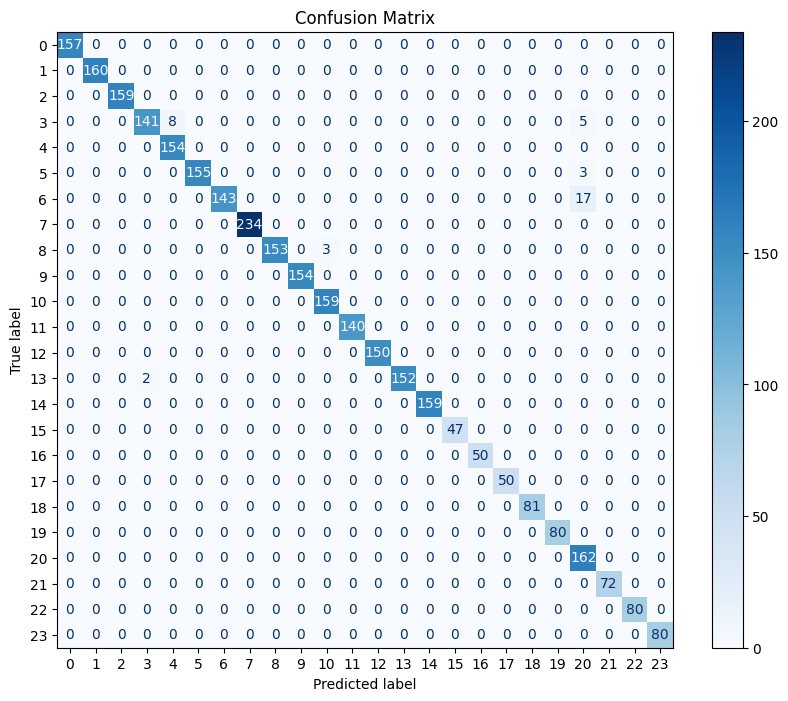


Classification Report:
                      precision    recall  f1-score   support

             apple_6       1.00      1.00      1.00       157
    apple_braeburn_1       1.00      1.00      1.00       160
apple_crimson_snow_1       1.00      1.00      1.00       159
      apple_golden_1       0.99      0.92      0.95       154
      apple_golden_2       0.95      1.00      0.97       154
      apple_golden_3       1.00      0.98      0.99       158
apple_granny_smith_1       1.00      0.89      0.94       160
         apple_hit_1       1.00      1.00      1.00       234
   apple_pink_lady_1       1.00      0.98      0.99       156
         apple_red_1       1.00      1.00      1.00       154
         apple_red_2       0.98      1.00      0.99       159
         apple_red_3       1.00      1.00      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       1.00      0.99      0.99       154
      apple_rotten_1       1.00      1.00    

In [33]:
y_pred = modelC.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 调整图形尺寸
fig, ax = plt.subplots(figsize=(10, 8))

# 生成混淆矩阵图
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title('Confusion Matrix')
plt.show()

class_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [34]:
f1=f1_score(y_true,y_pred_classes,average='weighted')
print('F1-score:', f1)

F1-score: 0.9878522663885185


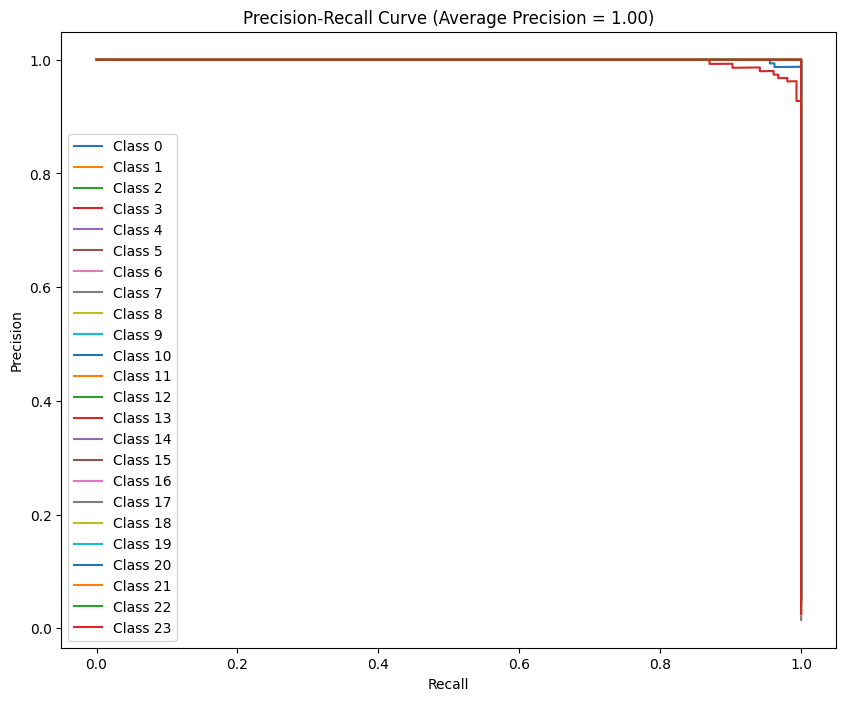

In [35]:
# 获取类别数量
n_classes = num_classes

# 将真实标签进行二进制编码
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# 计算每个类别的精确度、召回率和阈值
precision = dict()
recall = dict()
thresholds = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])

# 计算平均精确度
average_precision = average_precision_score(y_true_bin, y_pred, average='weighted')

# 绘制每个类别的精确度-召回率曲线
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Average Precision = {average_precision:.2f})')
plt.legend()
plt.show()

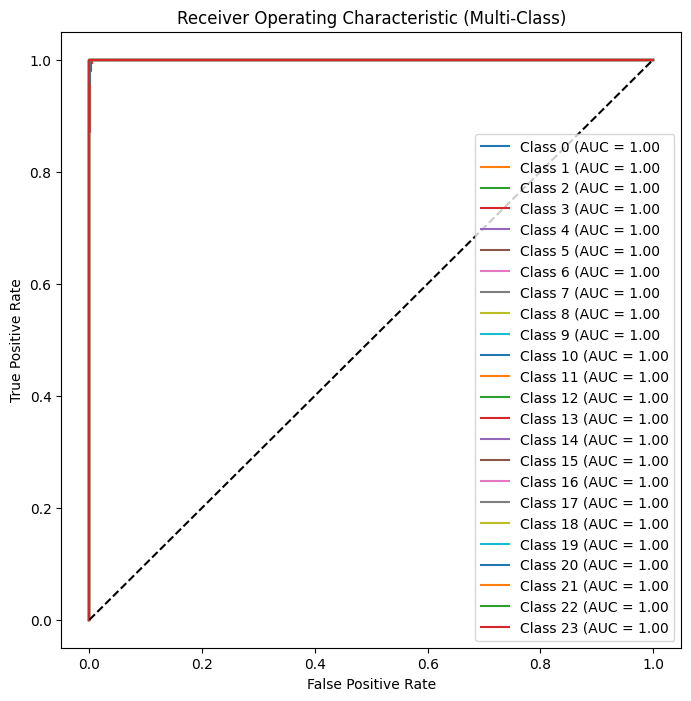

In [36]:
# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (y_true == class_label).astype(int),  # 二进制标签，表示当前类别为正类
        y_pred[:, class_label]  # 模型的预测概率值
    )

    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# 绘制多分类问题的 ROC 曲线
plt.figure(figsize=(8, 8))

for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (Multi-Class)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [37]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 计算每个类别的敏感性和特异性
num_classes = len(class_names)
sensitivity = []
specificity = []

for i in range(num_classes):
    # True positive
    tp = conf_matrix[i, i]

    # False negative
    fn = np.sum(conf_matrix[i, :]) - tp

    # False positive
    fp = np.sum(conf_matrix[:, i]) - tp

    # True negative
    tn = np.sum(conf_matrix) - tp - fn - fp

    # 计算敏感性和特异性
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# 输出结果
for i in range(num_classes):
    print(f"Class {class_names[i]} - Sensitivity: {sensitivity[i]:.4f}, Specificity: {specificity[i]:.4f}")

# 计算平均敏感性和特异性
average_sensitivity = np.mean(sensitivity)
average_specificity = np.mean(specificity)

print(f"\nAverage Sensitivity: {average_sensitivity:.4f}")
print(f"Average Specificity: {average_specificity:.4f}")

Class apple_6 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_braeburn_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_crimson_snow_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_golden_1 - Sensitivity: 0.9156, Specificity: 0.9993
Class apple_golden_2 - Sensitivity: 1.0000, Specificity: 0.9973
Class apple_golden_3 - Sensitivity: 0.9810, Specificity: 1.0000
Class apple_granny_smith_1 - Sensitivity: 0.8938, Specificity: 1.0000
Class apple_hit_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_pink_lady_1 - Sensitivity: 0.9808, Specificity: 1.0000
Class apple_red_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_red_2 - Sensitivity: 1.0000, Specificity: 0.9990
Class apple_red_3 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_red_delicios_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class apple_red_yellow_1 - Sensitivity: 0.9870, Specificity: 1.0000
Class apple_rotten_1 - Sensitivity: 1.0000, Specificity: 1.0000
Class cabbage_white_1 - Sensitiv